In [1]:
%load_ext autoreload

In [2]:
%autoreload
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from intrusion_detection.load_input_data import load_df
from intrusion_detection.preprocessing import preprocess_data

In [17]:
from functools import partial
from IPython.display import HTML, display, Markdown

def header(text, level):
    display(HTML(f"<h{level}>{text}</h{level}>"))

for level in range(1, 6):
    globals()[f"h{level}"] = partial(header, level=level)

In [4]:
df = load_df(
    file_path="../../data/kddcup.data_10_percent",
    header_file="../../data/kddcup.names"
)
df = preprocess_data(df)

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


## Features Exploration

In [6]:
target_columns = ["attack_type"]
feature_columns = [col for col in df.columns if not col in target_columns]
feature_columns_dtypes = df[feature_columns].dtypes

### Categorical Features

List of categorical features:

In [21]:
categorical_features = feature_columns_dtypes[
    feature_columns_dtypes == object
].index.to_list()

nl = "\n- "
display(Markdown(f"The categorical Features in our dataset are: {nl + nl.join(categorical_features)}"))

The categorical Features in our dataset are: 
- protocol_type
- service
- flag

#### Countplots of each categorical features

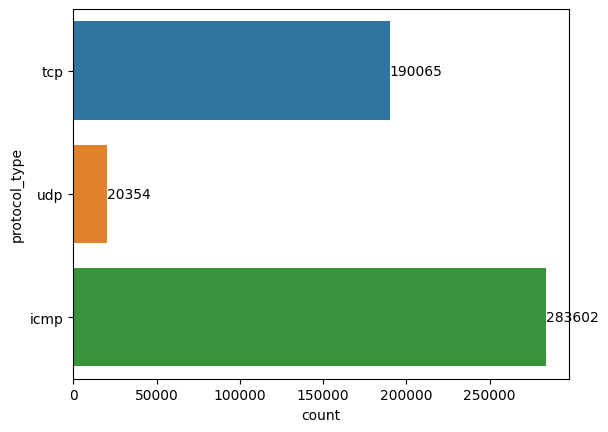

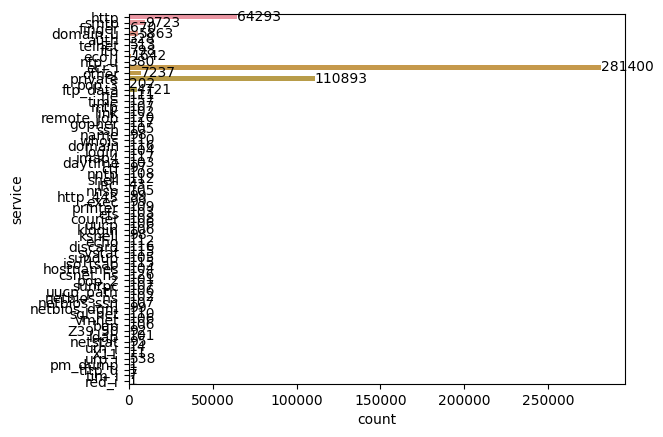

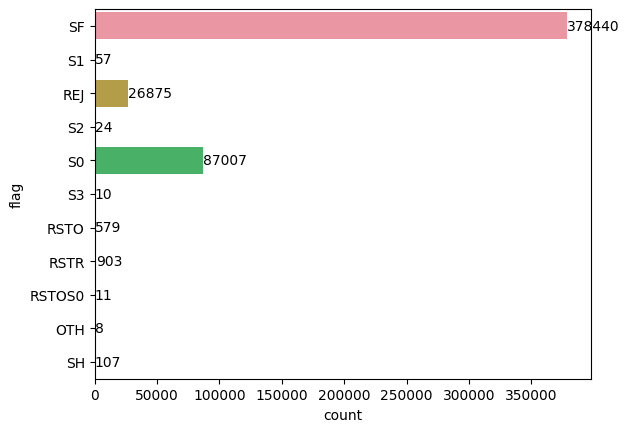

In [8]:
for feat in categorical_features:
    h5(feat)
    ax = sns.countplot(data=df, y=feat)
    ax.bar_label(ax.containers[0])
    plt.show()

##### Considerations

From the plots above we notice that the first categorical feature `protocol_type`, each of the 3 category is well represented in our dataset, whether for the other two categorical features, `service` and `flag`, some categories appear very rarely, in less than 1% of the cases. This suggests that we can encode `protocol_type` using one hot encoding and for `service` and `flag` we can group rare classes into a single bucket and then use one hot encoding. Moreover, we can also add the frequency encodings for the features `service` and `flag`.

## Numeric features

In [20]:
numerical_features = feature_columns_dtypes[
    feature_columns_dtypes != object
].index.to_list()

nl = "\n- "
display(Markdown(f"The numerical Features in our dataset are: {nl + nl.join(numerical_features)}"))

The numerical Features in our dataset are: 
- duration
- src_bytes
- dst_bytes
- land
- wrong_fragment
- urgent
- hot
- num_failed_logins
- logged_in
- num_compromised
- root_shell
- su_attempted
- num_root
- num_file_creations
- num_shells
- num_access_files
- num_outbound_cmds
- is_host_login
- is_guest_login
- count
- srv_count
- serror_rate
- srv_serror_rate
- rerror_rate
- srv_rerror_rate
- same_srv_rate
- diff_srv_rate
- srv_diff_host_rate
- dst_host_count
- dst_host_srv_count
- dst_host_same_srv_rate
- dst_host_diff_srv_rate
- dst_host_same_src_port_rate
- dst_host_srv_diff_host_rate
- dst_host_serror_rate
- dst_host_srv_serror_rate
- dst_host_rerror_rate
- dst_host_srv_rerror_rate

#### Countplots of each categorical features

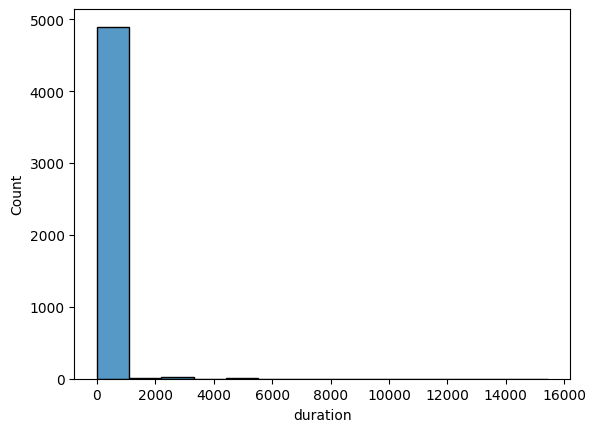

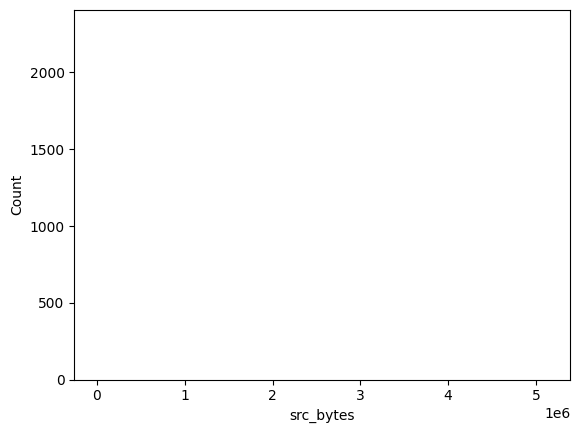

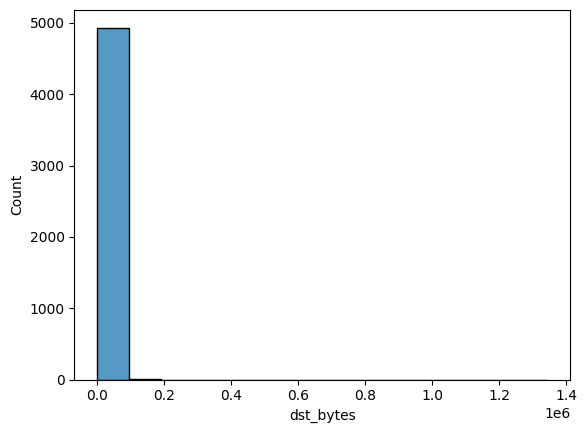

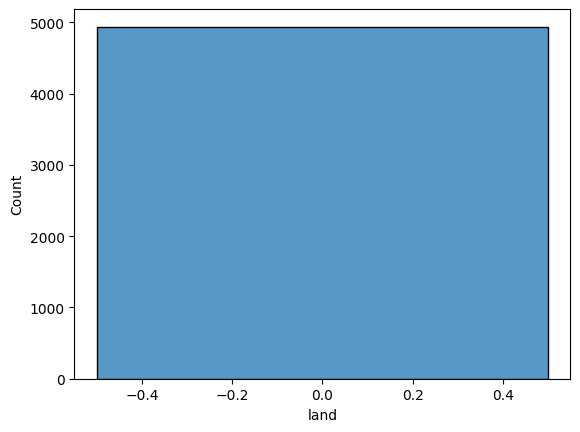

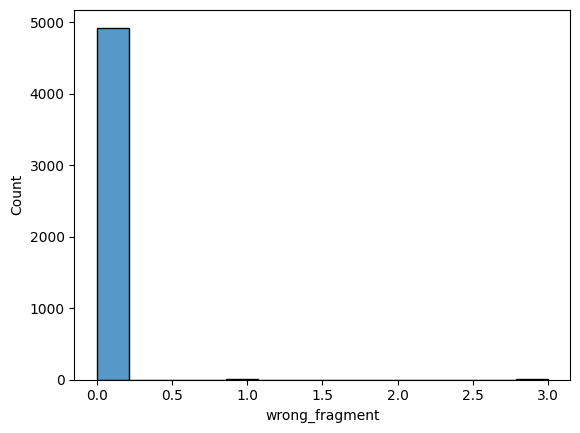

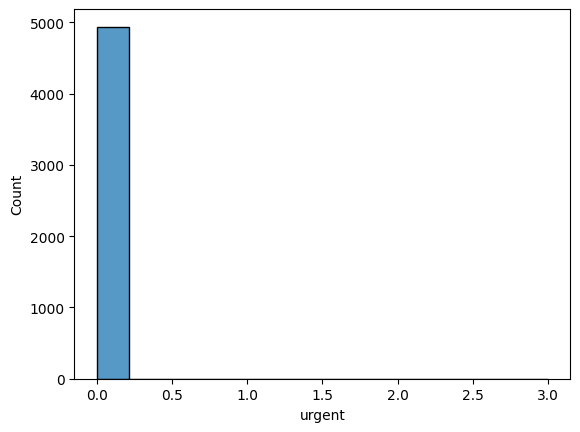

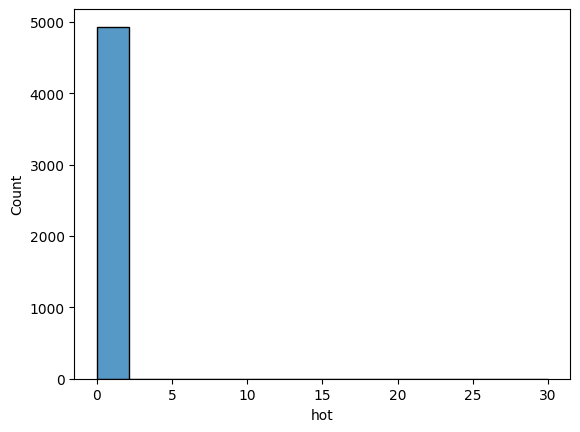

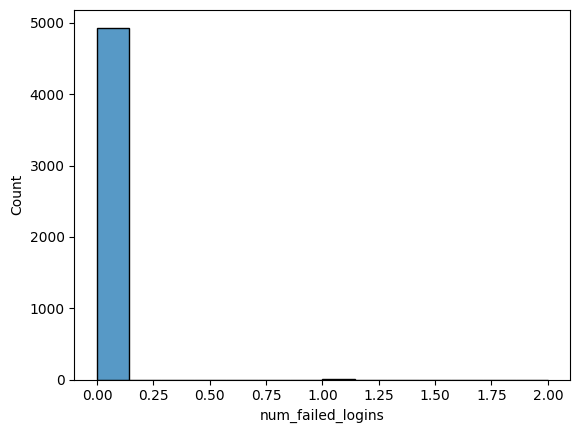

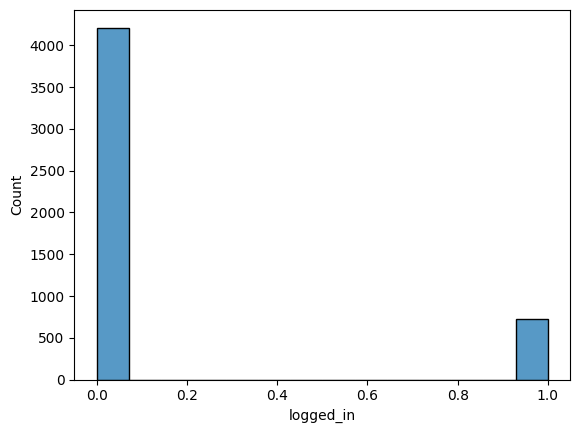

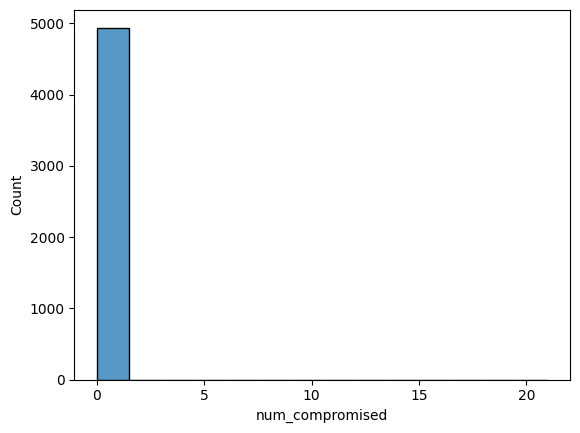

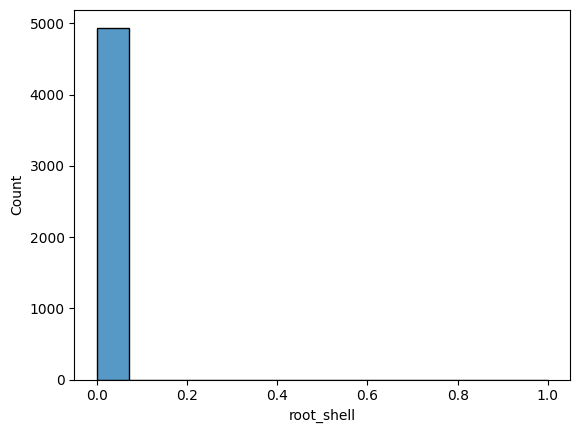

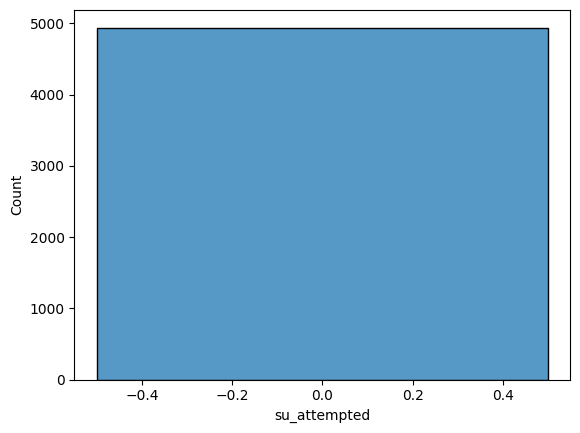

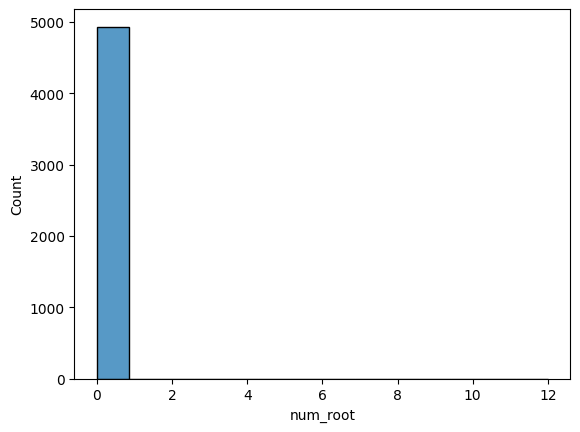

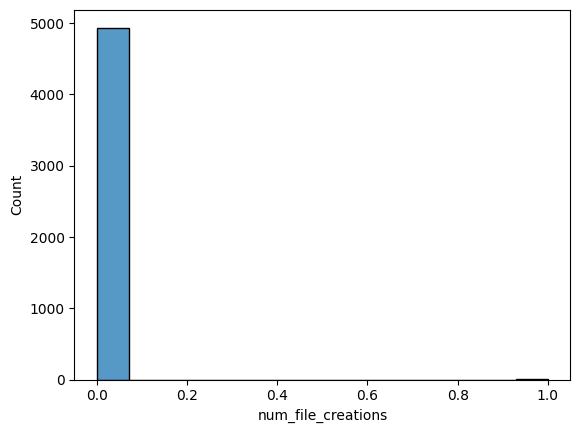

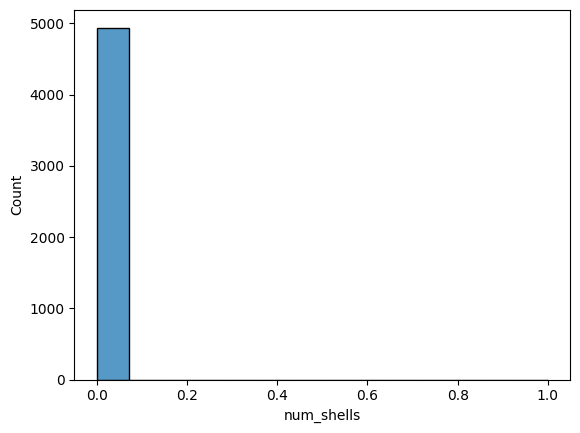

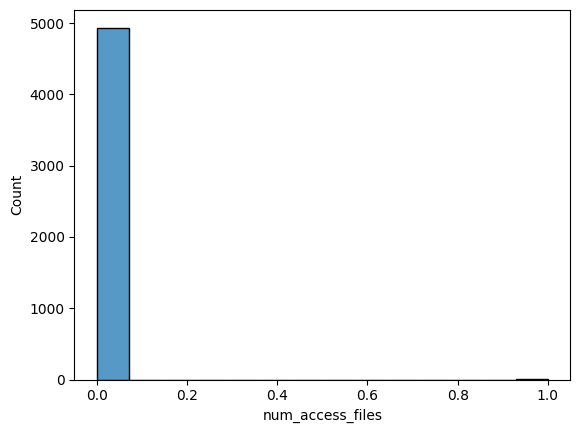

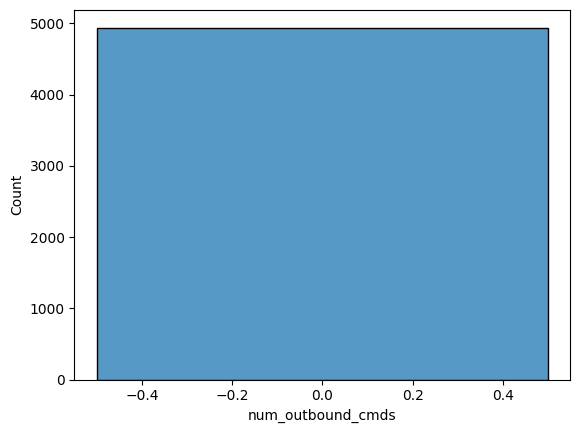

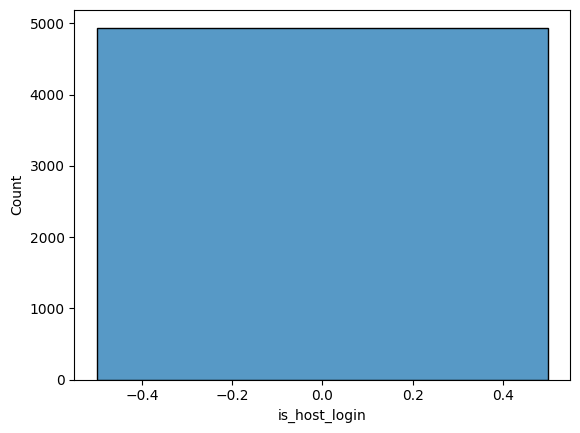

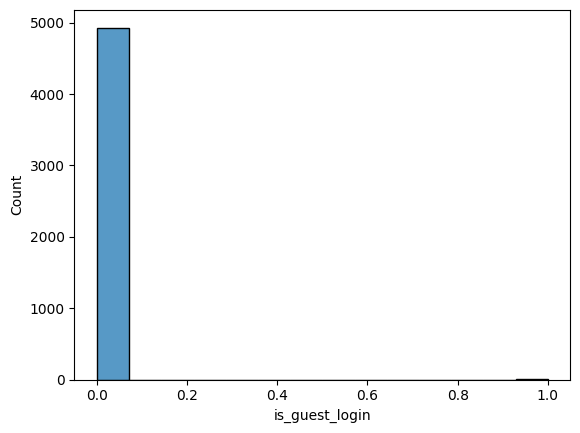

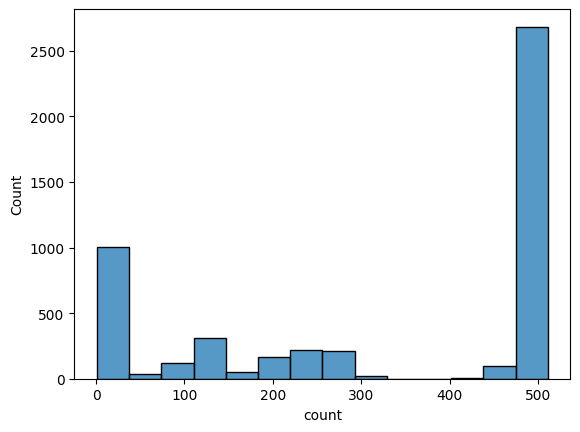

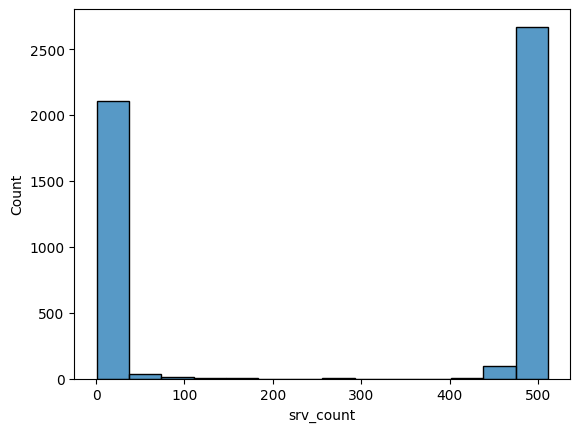

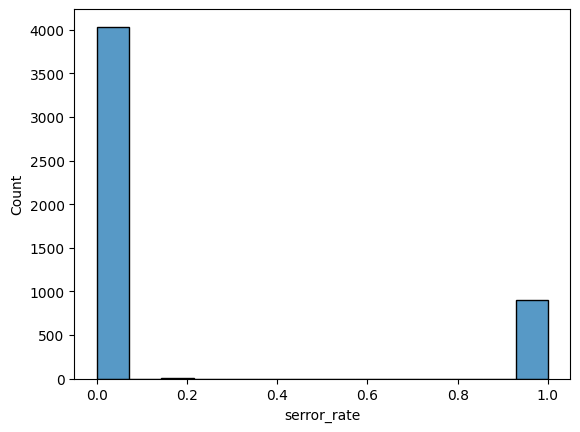

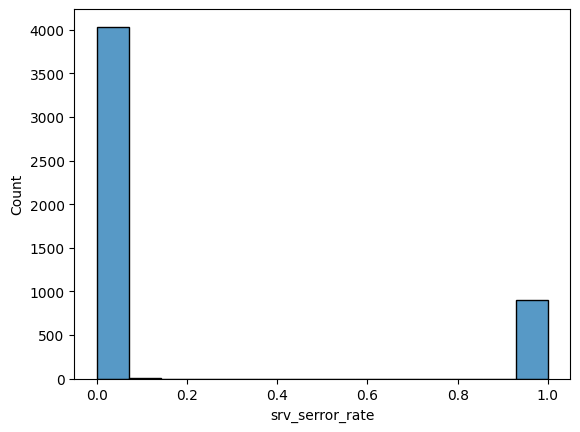

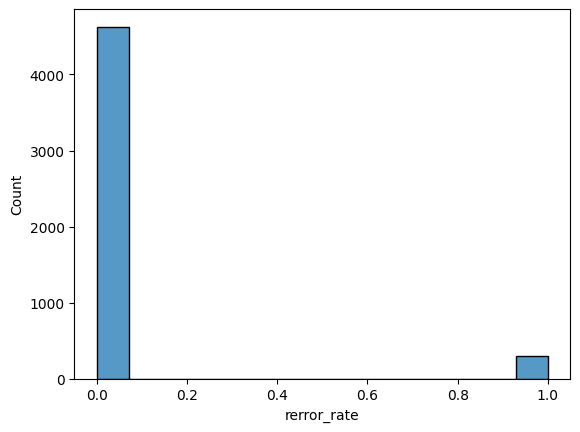

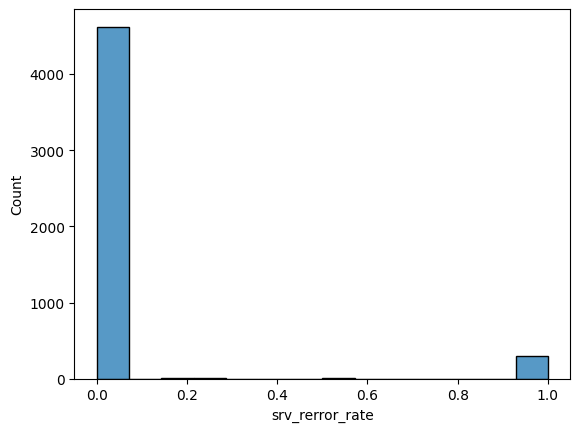

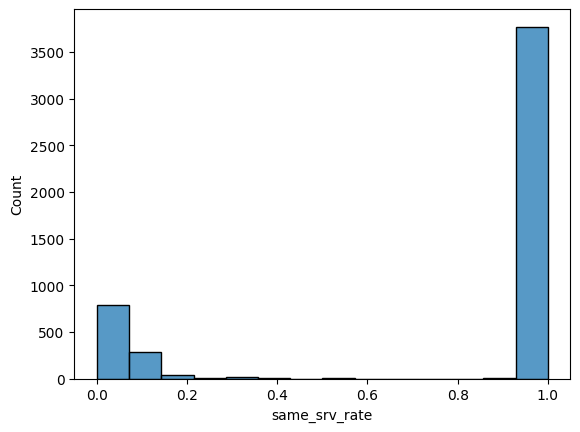

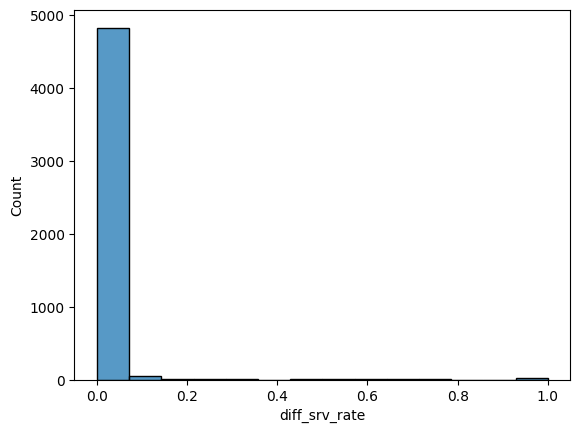

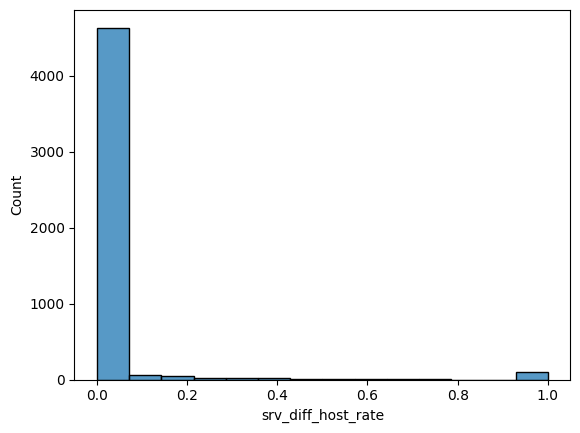

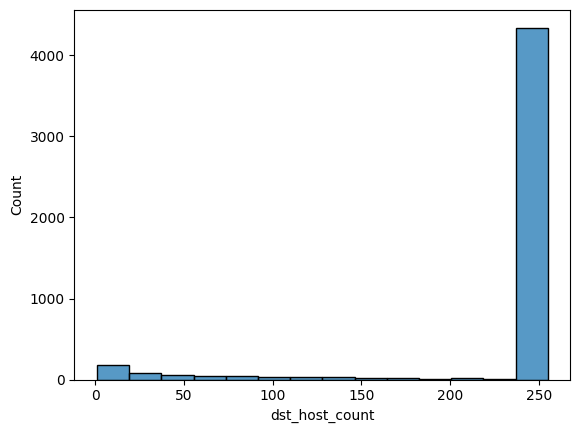

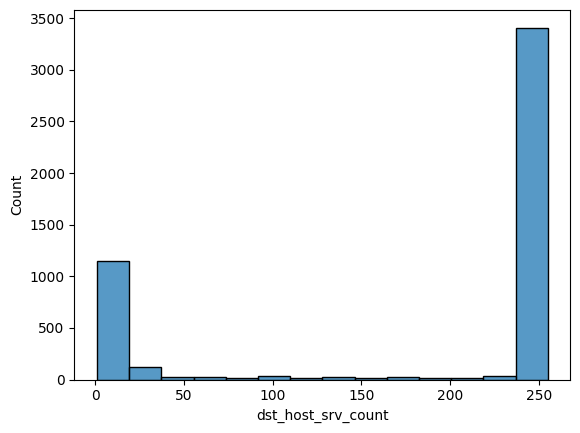

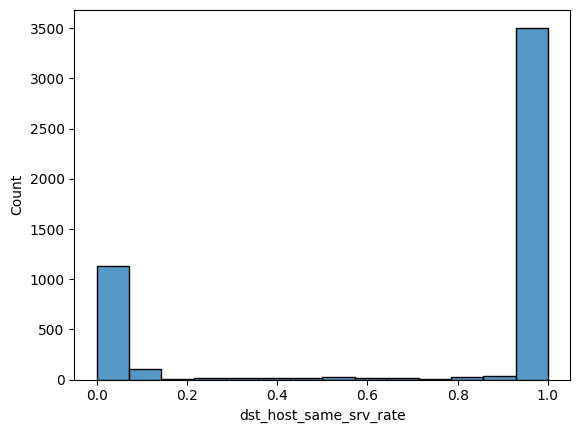

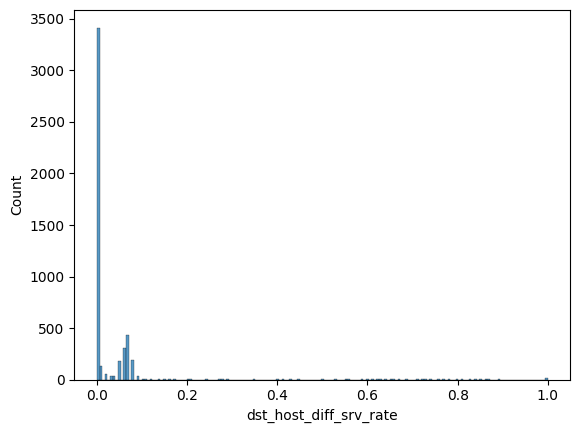

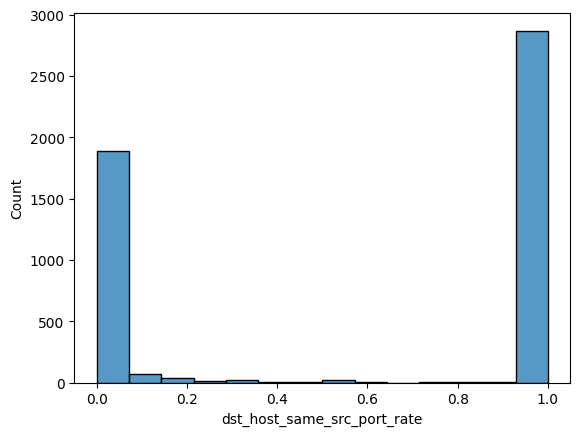

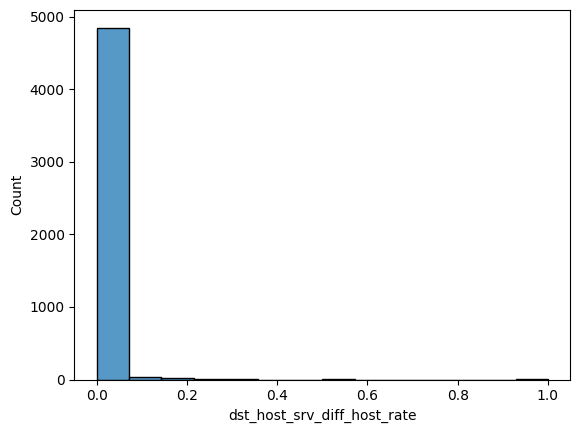

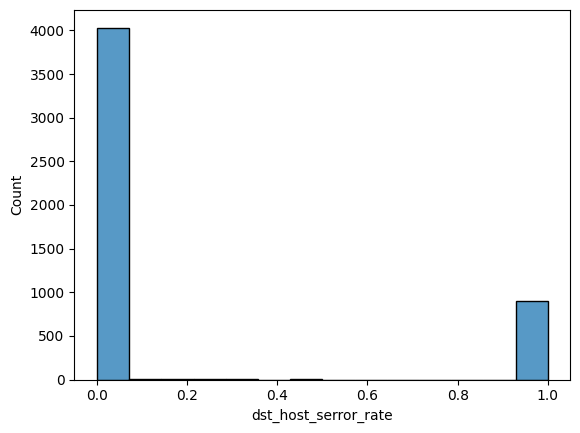

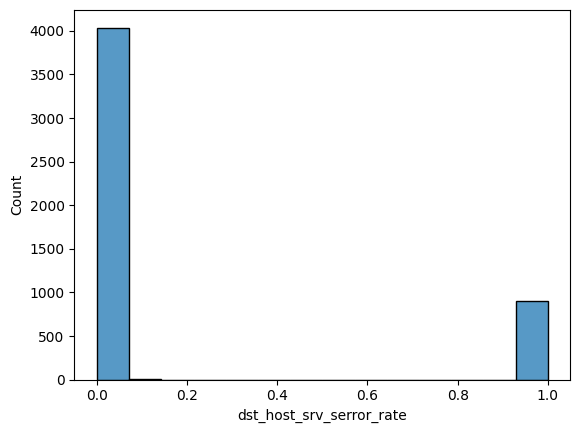

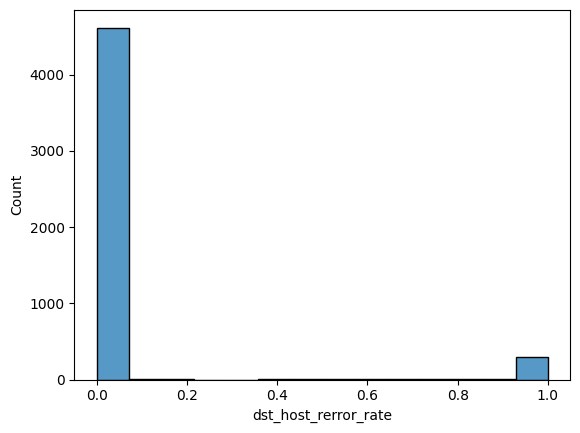

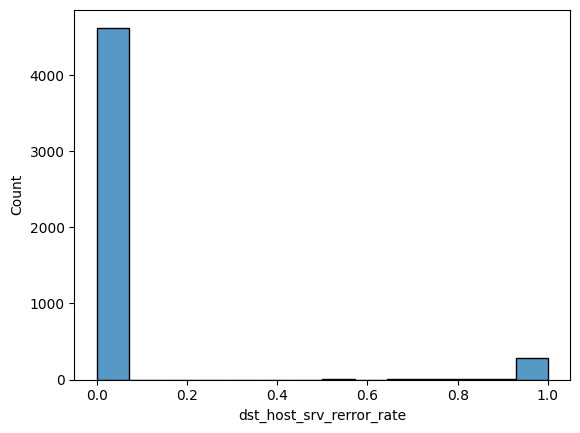

In [10]:
# Sampling to speed up computation
sample_df = df.sample(frac=0.01)
for feat in numerical_features:
    h5(feat)
    sns.histplot(data=sample_df, x=feat)
    plt.show()

#### Considerations

From the countplots above we notice that numerical features exibit highly skewed distributions with data concentrated mainly on few values. This suggests that models that rely on binning might have an edge over models that rely on distances and linear relationships between features and target. Moreover, features have different scales, suggesting that we might need to rescale features if we decide to use certain models.

Some features exhibit highly outlier values behavior like `dst_host_diff_srv_rate` and especially `src_bytes`. For this last one, I think that some cyber attacks heavily rely on overloading the target system by sending heavy requests. This column might be an interesting indicator for these type of attacks.